<a href="https://colab.research.google.com/github/Misery-1015/ML/blob/main/AdalineGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn
zhfont = matplotlib.font_manager.FontProperties(fname='SimHei .ttf')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 102MB/s]


In [94]:
class AdalineGD():
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def activation(self,x):
        return x

    def predict(self, x):
        return np.where(self.activation(self.net_input(x))>=0,1,-1)

    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            net_input=self.net_input(x)
            output = self.activation(net_input)
            # print(output)

            errors=y-output
            errors=np.array(errors,dtype=float)
            # if i%100 ==0:
              # print(errors)
              # print("\n\n\n")

            self.w_[1:]+=self.eta*x.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()

            cost = (errors**2).sum()/2.0
            # if i%100 ==0:
            #   print(cost)
            #   print("\n\n\n")
            self.cost_.append(cost)
        return self

In [95]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)


In [96]:
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
x = df.iloc[0:100,0:4].values

yt=df.iloc[100:,4].values
yt=np.where(yt=='Iris-setosa',-1,1)
xt = df.iloc[100:,0:4].values

In [97]:
yt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [98]:
ada=AdalineGD(n_iter=101,eta=0.0001)
ada.fit(x,y)


In [99]:
ada.net_input(x)
ada.w_

array([-0.03718702, -0.08634895, -0.31132985,  0.46337727,  0.21200092])

In [100]:
ada.w_

array([-0.03718702, -0.08634895, -0.31132985,  0.46337727,  0.21200092])

In [101]:
acc=0
print(len(xt))
for i in range(50):
  if(ada.predict(xt[i])==yt[i]):
    acc+=1
print(acc)

50
50


Text(0.5, 1.0, 'Adaline-Learning_rate_0.0001')

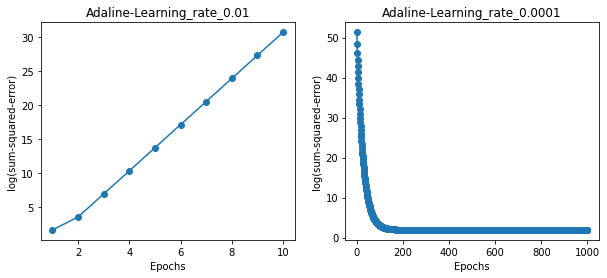

In [102]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ada1=AdalineGD(n_iter=10,eta=0.01).fit(x,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs');ax[0].set_ylabel('log(sum-squared-error)');ax[0].set_title('Adaline-Learning_rate_0.01')

ada2=AdalineGD(n_iter=1000,eta=0.0001).fit(x,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs');ax[1].set_ylabel('log(sum-squared-error)');ax[1].set_title('Adaline-Learning_rate_0.0001')

In [103]:
for i in range(100):
  print(ada1.predict(x[i]))

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [104]:
for i in range(100):
  print(y[i])

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [105]:
ada2.w_

array([-0.06414611, -0.11115308, -0.34798607,  0.53295499,  0.28719495])

In [106]:
ada1.w_

array([-3.09634211e+14, -1.72237950e+15, -9.51763865e+14, -9.47321172e+14,
       -2.66579668e+14])